In [1]:

import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


In [2]:
data_imgs = fetch_openml('mnist_784', as_frame=False, data_home=None)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.datasets import mnist

La precisión del modelo es: 0.9777142857142858


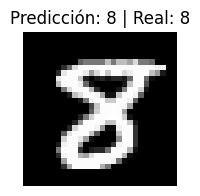

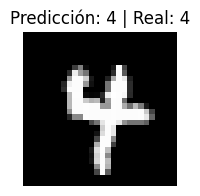

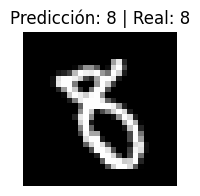

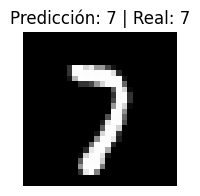

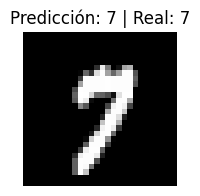

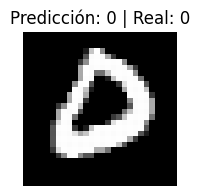

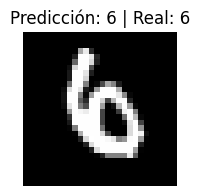

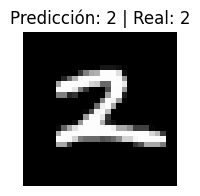

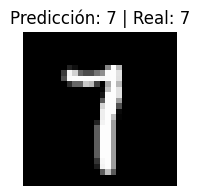

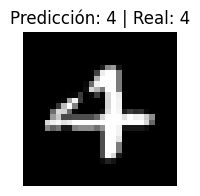

In [13]:

class image_number_detector:

    def __init__(self, xdata, ydata, image_shape=(28, 28)):
        self.xdata = xdata
        self.ydata = ydata
        self.image_shape = image_shape

    def img_preprocessing(self):
        # flatting the image dividing by 255
        self.xpreprocessed_data = np.array([image.flatten() for image in self.xdata]) / 255.0

    def train_test_split(self, test_size):
        self.test_size = test_size
        self.data_split = train_test_split(
            self.xpreprocessed_data, self.ydata,
            test_size=test_size, random_state=42
        )

    def model_train(self, model_type):
        self.model_type = model_type
        self.model_trained = self.model_type.fit(
            self.data_split[0], self.data_split[2]
        )

    def model_predict(self):
        self.prediction = self.model_type.predict(self.data_split[1])
        return self.prediction

    def model_accuracy(self):
        self.accuracy = accuracy_score(self.data_split[3], self.prediction)
        print("La precisión del modelo es:", self.accuracy)

    def visualize_predictions(self, num_images=10):
        x_test = self.data_split[1]
        y_test = self.data_split[3]
        preds = self.prediction

        for i in range(min(num_images, len(x_test))):
            image = x_test[i].reshape(self.image_shape)
            plt.figure(figsize=(2, 2))
            plt.imshow(image, cmap='gray', interpolation='nearest')
            plt.title(f"Predicción: {preds[i]} | Real: {y_test[i]}")
            plt.axis('off')
            plt.show()

# Loading Dataset

(x_train, y_train), (x_test, y_test) = mnist.load_data()

#concatenate dataset to plot it later

x_data = np.concatenate((x_train, x_test), axis=0)
y_data = np.concatenate((y_train, y_test), axis=0)

# Creating and executing model

neural_network2 = MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, random_state=42)

model1 = image_number_detector(x_data, y_data, image_shape=(28, 28))
model1.img_preprocessing()
model1.train_test_split(test_size=0.1)
model1.model_train(neural_network2)
model1.model_predict()
model1.model_accuracy()
model1.visualize_predictions(num_images=10)
